[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/三菱重工vs日立製作所.ipynb)

# 三菱重工 vs 日立製作所

三菱重工業株式会社...船舶, 発電プラント, 環境装置, 産業用機械, 航空・宇宙機器, エアコンなどの製造・販売・エンジニアリング<br>
株式会社日立製作所...情報通信システム, エネルギー, 産業システム, 都市インフラ, 電子機器, ヘルスケア<br>

**2社の比較** <br>
三菱重工 : 製造技術に特化, それらの事業間での領域を増やす.<br>
日立製作所 : 製造技術に加え, ITサービスの提供を柱とし, 製造からサービス提供までを自社で完結を目指す.<br>
<br>

In [ ]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 三菱重工
**財務データ参照先**<br>
https://www.mhi.com/jp/finance/library/result/pdf/fy20234q/kessan_tansin.pdf

In [3]:
# 三菱重工の必要データを準備
MHI_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/MHI_category.csv",
    encoding = "UTF-8"
    ).set_index("Category")


MHI_data

,Energy,Infrastructure,Drive Systems,Universe
Category,,,,
Sales,1752569,758730,1310359,790342


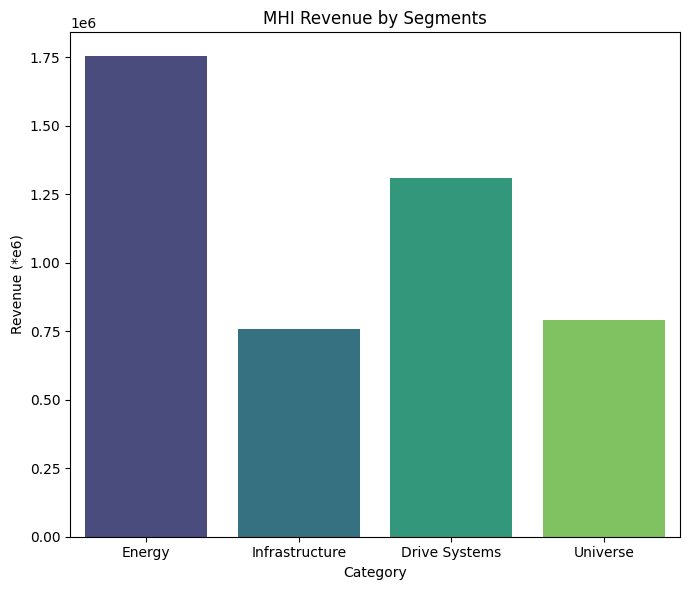

In [4]:
df = MHI_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("MHI Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://www.mhi.com/jp/finance/library/result/pdf/fy20234q/kessan_tansin.pdf
- エナジー<br>
火力発電, 再生可能エネルギー発電(風力発電プラントetc.), 技術薄膜型太陽電池, 原子力発電,<br> エンジン発電, 燃料電池, 石油・ガス生産, 航空機用エンジン, 舶用エンジン<br>
- プラント・インフラ<br>
(a) 環境装置(廃棄物処理装置、環境保護装置)<br>
(b) プロセスプラント(化学、製鉄プラント)<br>
(c) 水処理や上下水道向けインフラ設備<br>
- 物流・冷熱・ドライブシステム<br>
(a) エレベーター・エスカレーターの設計・販売  
(b) 物流向け機器(フォークリフト、クレーンなど)<br> 
(c) 空調機器(業務用・家庭用エアコン、冷凍機)<br>
- 航空・防衛・宇宙<br>
(a) 航空機(民間航空機部品、軍用機械)<br>
(b) 宇宙機器(ロケット、人工衛星)<br>
(c) 防衛関連機器(潜水艦、艦艇、ミサイル)<br>



In [21]:
# セグメント値の設定
seg1_value = MHI_data["Energy"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = MHI_data["Infrastructure"].iloc[0] * 1e6
seg3_value = MHI_data["Drive Systems"].iloc[0] * 1e6
seg4_value = MHI_data["Universe"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value, seg4_value]


# 専業企業リスト
Energy = [
    "9501.T",  # 東京電力HD
    "9502.T",  # 中部電力
    "9503.T",  # 関西電力
    "9513.T",  # J-Power
    "9531.T",  # 東京ガス
    "9532.T",  # 大阪ガス
    "1605.T",  # INPEX（石油・天然ガス）
    "1662.T"   # 石油資源開発
    ]


Infrastructure = [
    "6501.T",  # 日立製作所(上下水道向け設備、環境保護装置)
    "6367.T",  # ダイキン工業(環境制御装置)
    "6326.T",  # クボタ(水処理装置、上下水道)
    "3101.T",  # 東洋(上下水道フィルター技術)
    "3402.T",  # 東レ(膜処理技術、上下水道向け)
    "4004.T",  # 昭和電工(化学プラント)
    "3407.T",  # 旭化成(化学プラント)
    "5401.T",  # 日本製鉄(製鉄プラント)
    "1963.T",  # 日揮(製鉄)
    "1801.T",  # 大成建設
    "1802.T",  # 大林組
    "1803.T",  # 清水建設
    "1812.T",  # 鹿島建設（インフラ建設）
    "6333.T",  # 帝国ピストンリング（環境装置部品）
    "6330.T",  # 東洋エンジニアリング（プラントエンジニアリング）
]

Drive_Systems = [
    "6367.T",  # ダイキン工業（空調）
    "6503.T",  # 富士電機(空調)
    "6594.T",  # 日本電産(モーター)
    "7012.T",  # 川崎重工業(重機)
    "7201.T",  # 日産自動車(ドライブシステム？)
    "7203.T",  # トヨタ自動車(フォークリフト)
    "7267.T",  # ホンダ（自動車エンジン）
    "3105.T",  # 日清紡HD(自動車部品)
    "6473.T",   # ジェイテクト(自動車ステアリング)
    "6501.T",  # 日立製作所(家電)
    "6305.T",  # 日立建機(重機)
    "6471.T",  # 日本精工(自動車, 船舶等のメーター)
    "6645.T",  # オムロン(物流システム)
    "6586.T"   # マキタ
    ]


Universe = [
    "7011.T",  # 三菱重工業
    "7012.T",  # 川崎重工業(航空・宇宙・防衛)
    "7013.T",  # IHI(航空エンジン)
    "6752.T",  # パナソニックHD(宇宙関連機器)
    "7751.T",  # キヤノン(人工衛星)
    "7752.T",  # リコー(宇宙関連機器)
    "186A.T",  # アストロHD(宇宙ゴミ観測衛星)
    "5595.T",  # QPS研究所(軽量化衛星)
    "9348.T",  # ispace(月面探査)
    ]

specialized_tickers = [Energy, Infrastructure, Drive_Systems, Universe]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "7011.T", # 三菱重工業株式会社
    specialized_tickers = specialized_tickers,
    data = MHI_data
)

# ソフトバンクグループの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 8825006363904.0
超過価値 (EXVAL): 1.0399653575071115


## 株式会社日立製作所
**財務データ参照先**<br>
https://www.hitachi.co.jp/New/cnews/month/2024/04/0426/2023_Anpre.pdf

In [12]:
# 日立製作所の必要データを準備
Hitachi_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/Hitachi_category.csv",
    encoding = "UTF-8"
    ).set_index("Category")


Hitachi_data

,DSS,GEM,CI
Category,,,
Sales,25986,30523,30579


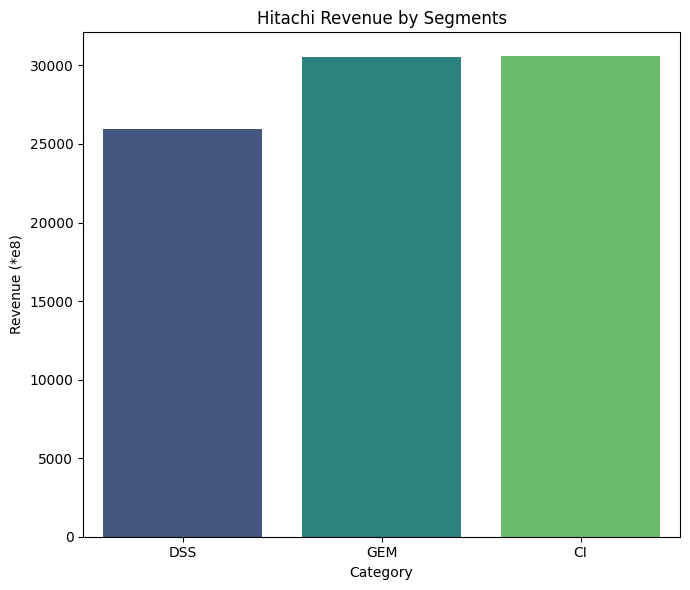

In [13]:
df = Hitachi_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Hitachi Revenue by Segments")
plt.ylabel("Revenue (*e8)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://www.hitachi.co.jp/New/cnews/month/2024/04/0426/2023_Anpre.pdf

- デジタルシステム・サービス
(a) フロントビジネス(金融、公共、エネルギー分野での大口システム更新案件)<br>
(b) ITサービス(セキュリティ, クラウド関連. 製造・流通向けサービスやDX, クラウドサービス)<br>
-  グリーンエナジー・モビリティ
(a) 鉄道事業(鉄道システムや運行管理の提供)<br>
(b) 原子力・再生可能エネルギー事業(原子力・風力・太陽光発電など, 再生可能エネルギーの推進)<br>
-  コネクティブインダストリーズ
(a) ビルシステム(新設エレベータ等)<br>
(b) 計測分析システム(生化学免疫自動分析装置, 半導体製造装置)<br>
(c) 空調システム(半導体・電子向け空調システム)<br>

In [23]:
# セグメント値の設定
seg1_value = Hitachi_data["DSS"].iloc[0] * 1e8 # 単位 : 億円
seg2_value = Hitachi_data["GEM"].iloc[0] * 1e8
seg3_value = Hitachi_data["CI"].iloc[0] * 1e8

seg_list = [seg1_value, seg2_value, seg3_value]

# 専業企業リスト
DSS = [
    "4307.T",  # 野村総研
    "6701.T",  # NEC
    "6758.T",  # ソニーG
    "4768.T",  # 大塚商会
    "9984.T",  # ソフトバンク（クラウド・セキュリティ）
    "2327.T",  # 日鉄ソリュ
    "4689.T",  # Zホールディングス(LINEヤフー)
    "8056.T",  # BIPROGY
    "4704.T",  # トレンドマイクロ（セキュリティ）
    "9984.T",  # ソフトバンク
    "9432.T",  # NTT
    ]

GEM = [
    "6501.T",  # 日立製作所（鉄道、原子力・再生可能エネルギー）
    "7011.T",  # 三菱重工業（エネルギー関連事業）
    "9513.T",  # J-POWER（電力、再生可能エネルギー）
    "9531.T",  # 東京ガス（再生可能エネルギー）
    "9532.T",  # 大阪ガス（エネルギー供給）
    "1605.T",  # INPEX（石油・天然ガス）
    "7203.T",  # トヨタ自動車（水素エネルギー、モビリティ）
    "6301.T",   # コマツ（建設機械、持続可能技術）
    ]

CI = [
    "6501.T",  # 日立製作所（ビルシステム）
    "6367.T",  # ダイキン工業（空調システム、冷凍機）
    "6326.T",  # クボタ（農業機械、水処理設備）
    "1963.T",  # 日揮（プラントエンジニアリング）
    "4519.T"   # 中外製薬（診断機器・医療分析システム）
    ]

specialized_tickers = [DSS, GEM, CI]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "6501.T", # 株式会社日立製作所
    specialized_tickers = specialized_tickers,
    data = Hitachi_data
)

# ソフトバンクグループの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 19470022789504.0
超過価値 (EXVAL): 0.5759505601095279
